In [5]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold
import scipy.stats as stat
import pylab
import xgboost as xgb
from sklearn.preprocessing import PolynomialFeatures

In [19]:
X = pd.read_csv("Train_Xsouth.csv",usecols=['temp','sal','mld','chla','dic','no3'])
y = pd.read_csv("Train_ysouth.csv",usecols=['misfit'])
X_test = pd.read_csv("Test_Xsouth.csv",usecols=['temp','sal','mld','chla','dic','no3'])
y_test = pd.read_csv("Test_ysouth.csv",usecols=['misfit'])

X['chla'] =np.log(X['chla'])
X['no3'] =np.log(X['no3'])
X['mld'] =np.log(X['mld'])

X_test['mld'] =np.log(X_test['mld'])
X_test['no3'] =np.log(X_test['no3'])
X_test['chla'] =np.log(X_test['chla'])


In [20]:
# sc = StandardScaler()
# X = sc.fit_transform(X)
# X_test = sc.transform(X_test)

In [22]:
kfold = KFold(n_splits=10)

In [28]:
#Used and written ...........................................
params={'lambda': 0.9108763751137466,
 'alpha': 0.3066694105063516,
 'subsample': 0.911908111466402,
 'colsample_bytree': 0.6010856400991826,
 'max_depth': 23,
 'min_child_weight': 19,
 'learning_rate': 0.18999480215303258,
 'gamma': 0.5006001588939524,
 'n_estimators': 250,'random_state':0}
#'''''''''''''''''''''''''''''''''''''''''''''''''''''''''

In [29]:
for train_ix, val_ix in kfold.split(X):
    X_train, X_val = X.iloc[train_ix], X.iloc[val_ix]
    y_train, y_val = y.iloc[train_ix], y.iloc[val_ix]
    # model = xgb.XGBRegressor()
    model = xgb.XGBRegressor(**params)
    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val,y_val)])

[0]	validation_0-rmse:56.17883	validation_1-rmse:56.20529
[1]	validation_0-rmse:46.49168	validation_1-rmse:46.57744
[2]	validation_0-rmse:38.72814	validation_1-rmse:38.84285
[3]	validation_0-rmse:32.67958	validation_1-rmse:32.82931
[4]	validation_0-rmse:27.93461	validation_1-rmse:28.10722
[5]	validation_0-rmse:24.23419	validation_1-rmse:24.39924
[6]	validation_0-rmse:21.43493	validation_1-rmse:21.59596
[7]	validation_0-rmse:19.31813	validation_1-rmse:19.44457
[8]	validation_0-rmse:17.74319	validation_1-rmse:17.84090
[9]	validation_0-rmse:16.62884	validation_1-rmse:16.70275
[10]	validation_0-rmse:15.82966	validation_1-rmse:15.87565
[11]	validation_0-rmse:15.23858	validation_1-rmse:15.26013
[12]	validation_0-rmse:14.84025	validation_1-rmse:14.85276
[13]	validation_0-rmse:14.54274	validation_1-rmse:14.52255
[14]	validation_0-rmse:14.34172	validation_1-rmse:14.30531
[15]	validation_0-rmse:14.17749	validation_1-rmse:14.10983
[16]	validation_0-rmse:14.07647	validation_1-rmse:14.00312
[17]	va

In [31]:
y_pred = model.predict(X_test)
r21 = r2_score(y_test,y_pred)
print(r21)
rmse = mean_squared_error(y_test,y_pred,squared=False)
print(rmse)

0.9597197771072388
13.817355855434922


/home/kunal/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [32]:
y_pred_train = model.predict(X_train)
r2_tr = r2_score(y_train,y_pred_train)
print(r2_tr)
rmse_tr = mean_squared_error(y_train,y_pred_train,squared=False)
print(rmse_tr)

0.9611995816230774
13.426144474551904


/home/kunal/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(13.0, 16.0)

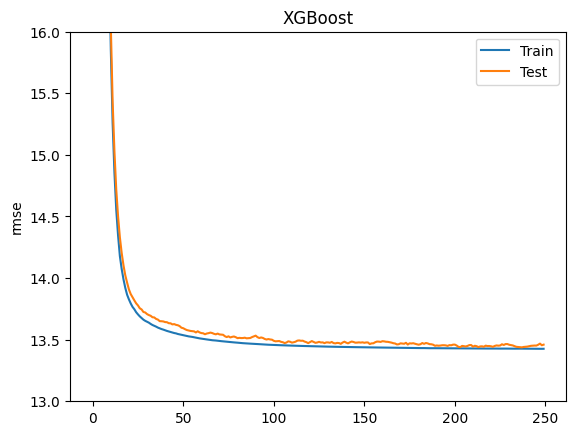

In [36]:
results = model.evals_result()
fig, ax = plt.subplots()
ax.plot( results['validation_0']['rmse'], label='Train')
ax.plot( results['validation_1']['rmse'], label='Test')
ax.legend()
plt.ylabel('rmse')
plt.title('XGBoost')
plt.ylim([13,16])

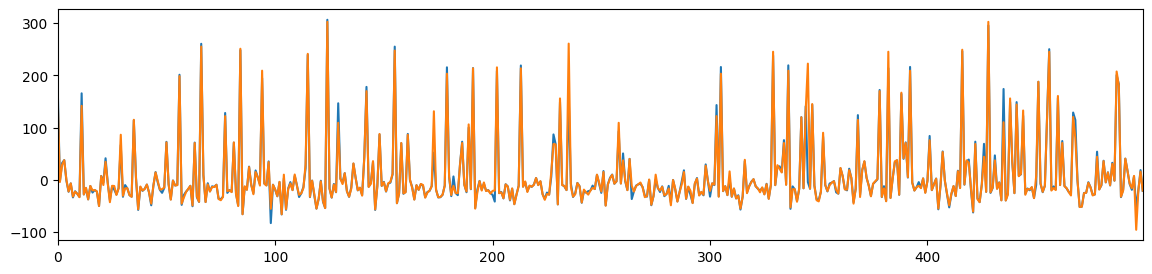

In [24]:
fig,ax=plt.subplots(figsize=(14,3))
ax=ax.margins(x=0)
plt.plot(y_test[0:500])
plt.plot(y_pred[0:500])

In [25]:
from joblib import dump
dump(model,"xgb_SD_south.joblib.dat")

['xgb_SD_south.joblib.dat']